# Frequency Analysis



*   Dataset : 네이버 영화 리뷰 데이터로 감성 분류를 위해 제작된 데이터셋

*   해당 데이터셋에서 '사용자의 리뷰' 텍트만을 사용







In [1]:
import pandas as pd

DATA = "https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt"
df = pd.read_csv(DATA, sep='\t',header=0)
texts = df['document'].values.tolist()
texts[:10] # 10개만 샘플로 확인

['아 더빙.. 진짜 짜증나네요 목소리',
 '흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나',
 '너무재밓었다그래서보는것을추천한다',
 '교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정',
 '사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 던스트가 너무나도 이뻐보였다',
 '막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.',
 '원작의 긴장감을 제대로 살려내지못했다.',
 '별 반개도 아깝다 욕나온다 이응경 길용우 연기생활이몇년인지..정말 발로해도 그것보단 낫겟다 납치.감금만반복반복..이드라마는 가족도없다 연기못하는사람만모엿네',
 '액션이 없는데도 재미 있는 몇안되는 영화',
 '왜케 평점이 낮은건데? 꽤 볼만한데.. 헐리우드식 화려함에만 너무 길들여져 있나?']

In [2]:
len(texts)

150000

- 한국어 토크나이저 : 한국어 문장 내의 단어를 추출/분리하기 위해 한국어 형태소 분석기 이용 권장.</br>단순 띄어쓰기를 기반으로 분리하게 되면, 같은 의미라도 접미사에 따라 다른 단어로 인식될 수 있기 때문.

In [ ]:
# 한국어 토크나이저 설치 코드

import os
import tensorflow as tf

path_mecab_zip = tf.keras.utils.get_file(
    'mecab-0.996-ko-0.9.2.tar.gz', origin='https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz',
    extract=True)

path_mecab_dic_zip = tf.keras.utils.get_file(
    'mecab-ko-dic-2.1.1-20180720.tar.gz', origin='https://bitbucket.org/eunjeon/mecab-ko-dic/downloads/mecab-ko-dic-2.1.1-20180720.tar.gz',
    extract=True)

os.chdir(os.path.join(os.path.dirname(path_mecab_zip),'mecab-0.996-ko-0.9.2/'))
!./configure
!make
!make check
!sudo make install

os.chdir(os.path.join(os.path.dirname(path_mecab_zip), 'mecab-ko-dic-2.1.1-20180720/'))
!sudo ldconfig
!ldconfig -p | grep /usr/local
!./configure
!make
!sudo make install

!pip install mecab-python3
!apt-get update
!apt-get install g++ openjdk-8-jdk python-dev python3
!pip3 install JPype1-py3
!pip3 install konlpy
!JAVA_HOME="/usr/lib/jvm/java-8-openjdk-amd64"
%cd /content/

In [4]:
from konlpy.tag import Mecab,Kkma,Komoran,Hannanum,Okt

tokenizer = Mecab()

for text in texts[:5]:
    tokenized = tokenizer.morphs(text)
    print(f"original text: {text}")
    print(f"tokenized text: {tokenized}")
    print("")

original text: 아 더빙.. 진짜 짜증나네요 목소리
tokenized text: ['아', '더', '빙', '.', '.', '진짜', '짜증', '나', '네요', '목소리']

original text: 흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나
tokenized text: ['흠', '.', '..', '포스터', '보고', '초딩', '영화', '줄', '.', '...', '오버', '연기', '조차', '가볍', '지', '않', '구나']

original text: 너무재밓었다그래서보는것을추천한다
tokenized text: ['너무', '재', '밓었다그래서보는것을추천한다']

original text: 교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정
tokenized text: ['교도소', '이야기', '구먼', '.', '.', '솔직히', '재미', '는', '없', '다', '.', '.', '평점', '조정']

original text: 사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 던스트가 너무나도 이뻐보였다
tokenized text: ['사이몬페그', '의', '익살', '스런', '연기', '가', '돋보였', '던', '영화', '!', '스파이더맨', '에서', '늙', '어', '보이', '기', '만', '했', '던', '커스틴', '던스트', '가', '너무나', '도', '이뻐', '보였', '다']



In [7]:
from konlpy.tag import Mecab,Kkma,Komoran,Hannanum,Okt

tokenizer = Mecab()

bag_of_words = {}
for text in texts:
  if not isinstance(text, str):
    continue
  tokens = tokenizer.morphs(text)
  for token in tokens:
    if token not in bag_of_words:
      bag_of_words[token] = 0
    bag_of_words[token] += 1
bag_of_words

{'아': 9141,
 '더': 5146,
 '빙': 272,
 '.': 160266,
 '진짜': 8327,
 '짜증': 1482,
 '나': 12840,
 '네요': 9052,
 '목소리': 371,
 '흠': 247,
 '..': 22813,
 '포스터': 568,
 '보고': 836,
 '초딩': 423,
 '영화': 57621,
 '줄': 2904,
 '...': 5356,
 '오버': 133,
 '연기': 6835,
 '조차': 315,
 '가볍': 249,
 '지': 19270,
 '않': 7731,
 '구나': 796,
 '너무': 11002,
 '재': 1718,
 '밓었다그래서보는것을추천한다': 1,
 '교도소': 12,
 '이야기': 2194,
 '구먼': 40,
 '솔직히': 1079,
 '재미': 4109,
 '는': 66841,
 '없': 15880,
 '다': 55503,
 '평점': 6296,
 '조정': 45,
 '사이몬페그': 2,
 '의': 33867,
 '익살': 11,
 '스런': 222,
 '가': 33439,
 '돋보였': 60,
 '던': 5903,
 '!': 19542,
 '스파이더맨': 62,
 '에서': 8072,
 '늙': 201,
 '어': 8852,
 '보이': 888,
 '기': 8100,
 '만': 11878,
 '했': 8144,
 '커스틴': 4,
 '던스트': 2,
 '너무나': 708,
 '도': 34142,
 '이뻐': 52,
 '보였': 121,
 '막': 430,
 '걸음마': 2,
 '뗀': 3,
 '3': 2620,
 '세': 732,
 '부터': 1969,
 '초등': 143,
 '학교': 397,
 '1': 5517,
 '학년': 130,
 '생': 430,
 '인': 6856,
 '8': 841,
 '살': 1836,
 '용': 1225,
 'ㅋㅋㅋ': 5385,
 '별반': 86,
 '개': 2814,
 '아까움': 378,
 '원작': 1329,
 '긴장감': 828,
 '을':

# 워드 클라우드 시각화
- 워드 클라우드 : 한정된 캔버스 내에 단어 빈도에 따라 그 단어에 크기를 부여해 시각화 하는 방법으로 단어의 빈도를 한 눈에 파악할 수 있다.

In [ ]:
#워드 클라우드 설치
!pip install wordcloud

# 워드 클라우드 생성 시, 한글 깨짐 현상이 발생하는데, 이를 방지하기 위해 나눔 글꼴을 설치한다.
!apt-get update -qq
!apt-get install fonts-nanum* -qq

In [ ]:
import os

# 한글 폰트의 경로 확인
path_font = '/usr/share/fonts/truetype/nanum/'
# 위 path_font 경로에 아래 폰트 중 사용하려는 폰트 이름을 붙여주면,
os.listdir(path_font) 

(-0.5, 399.5, 199.5, -0.5)

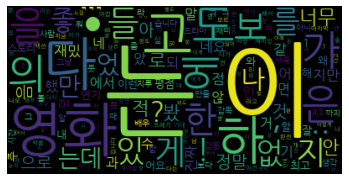

In [10]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

nanum_gothic = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
wordcloud = WordCloud(font_path=nanum_gothic)
image = wordcloud.generate_from_frequencies(bag_of_words)
plt.imshow(image, interpolation='bilinear')
plt.axis("off")

**불필요한 문자 제거**

*   '이', '는'과 같은 불필요한 단어 등장
*   분석에 도움을 줄 수 없는 단어로 판단됨
*   따라서 불필요한 단어를 제거한 'bag_of_words'를 생성





In [11]:
bag_of_words = {}
for text in texts:
    if not isinstance(text, str):
        continue
    tokens = tokenizer.pos(text)
    for token, pos in tokens:
        # 단어의 형태소가 체언이 아닌 경우 제외
        # 길이가 2보다 작을 경우 제외 
        if (not pos.startswith("N")) or (len(token) < 2):
            continue
        if token not in bag_of_words:
            bag_of_words[token] = 0
        bag_of_words[token]+=1
bag_of_words

{'짜증': 1482,
 '목소리': 371,
 '포스터': 568,
 '초딩': 423,
 '영화': 57621,
 '오버': 133,
 '연기': 6835,
 '교도소': 12,
 '이야기': 2194,
 '재미': 4109,
 '평점': 6296,
 '조정': 45,
 '사이몬페그': 2,
 '익살': 11,
 '스파이더맨': 62,
 '커스틴': 4,
 '던스트': 2,
 '걸음마': 2,
 '초등': 143,
 '학교': 397,
 '학년': 130,
 '원작': 1329,
 '긴장감': 828,
 '반개': 157,
 '이응경': 8,
 '길용우': 4,
 '생활': 146,
 '그것': 446,
 '납치': 48,
 '감금': 11,
 '반복': 154,
 '드라마': 5186,
 '가족': 1053,
 '사람': 5034,
 '액션': 2682,
 '건데': 361,
 '헐리우드': 151,
 '향수': 66,
 '자극': 285,
 '허진호': 6,
 '감성': 419,
 '절제': 62,
 '멜로': 97,
 '달인': 15,
 '횡단': 1,
 '보도': 13,
 '이범수': 37,
 '신문': 10,
 '기사': 63,
 '취향': 274,
 '존중': 36,
 '내생': 106,
 '극장': 943,
 '감동': 4860,
 '스토리': 5424,
 '어거지': 29,
 '긴장': 166,
 '바스코': 14,
 '이기면': 1,
 '락스': 3,
 '바비': 24,
 '아이돌': 140,
 '안달': 13,
 '굿바이': 20,
 '레닌': 6,
 '표절': 184,
 '이해': 1995,
 '이건': 2680,
 '깨알': 68,
 '캐스팅': 629,
 '내용': 4247,
 '구성': 596,
 '약탈자': 3,
 '변명': 29,
 '저놈': 7,
 '나름': 757,
 '학생': 133,
 '선생': 210,
 '가능': 399,
 '음식': 83,
 '바베트': 2,
 '만찬': 8,
 '핀란드': 8,
 '풍경': 119,

(-0.5, 399.5, 199.5, -0.5)

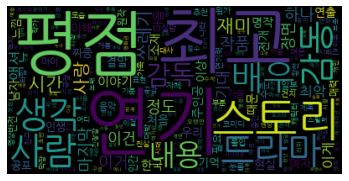

In [12]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

nanum_gothic = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'

stopwords = ["영화"]
for stopword in stopwords:
    if stopword in bag_of_words:
        del bag_of_words[stopword]
    
wordcloud = WordCloud(font_path=nanum_gothic).generate_from_frequencies(bag_of_words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

In [13]:
# 단어들을 빈도 순(내림차 순)으로 정렬
sorted_words = sorted(list(bag_of_words.items()), reverse=True, key=lambda x: x[1])

# 10개만 뽑아보기
sorted_words[:10] 

[('연기', 6835),
 ('최고', 6595),
 ('평점', 6296),
 ('스토리', 5424),
 ('드라마', 5186),
 ('생각', 5149),
 ('사람', 5034),
 ('감동', 4860),
 ('배우', 4436),
 ('내용', 4247)]